In [3]:
import pandas as pd
import numpy as np
import torch
from torch import optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
from numpy import loadtxt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
X_train = loadtxt('/content/drive/MyDrive/Học máy/preprocessing-data/word2vec/dataIntXTrain.csv', delimiter=',')
X_test = loadtxt('/content/drive/MyDrive/Học máy/preprocessing-data/word2vec/dataIntXTest.csv', delimiter=',')
y_train = loadtxt('/content/drive/MyDrive/Học máy/preprocessing-data/word2vec/dataIntYTrain.csv', delimiter=',')
y_test = loadtxt('/content/drive/MyDrive/Học máy/preprocessing-data/word2vec/dataIntYTest.csv', delimiter=',')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Deep(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Deep,self).__init__()
        
        self.hidden_size = hidden_size      
        self.layer1 = nn.Linear(input_size,hidden_size)
        self.layer2 = nn.Linear(hidden_size,hidden_size)
        self.layer3 = nn.Linear(hidden_size,hidden_size)
        self.layer4 = nn.Linear(hidden_size,64)
        self.layer5 = nn.Linear(64,output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(0.1)
    def forward(self,input):
        a1 = self.layer1(input)
        # out1 = F.tanh(a1)
        a2 = self.layer2(a1)
        out2 = F.leaky_relu(a2)
        a3 = self.layer3(out2)
        out3 = F.leaky_relu(a3)
        a4 = self.layer4(out3)
        out4 = F.leaky_relu(a4)

        a5 = self.layer5(out4)
        out5 = self.dropout(a5)
        output = self.softmax(out5)


        return output

    # def initHidden(self,size):
    #     return torch.zeros(size, self.hidden_size,device=device)


In [ ]:
def train(X,y,lstm_optimizer,deepCell):
    size = X.shape[0]
    # hidden = lstmCell.initHidden(size)
    # cadidate = lstmCell.initHidden(size)
    deep_optimizer.zero_grad()

    output = deepCell(X.float())
    # print(output)
    # return

    # print(type(output),type(y))

    
        
    # print(output[0])
    loss = criterion(output, y)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    deep_optimizer.step()
    return output, loss.item()

In [ ]:
import time
import math
import random



from torch import optim





# Keep track of losses for plotting


def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)
def trainEpoch1(lstmCell,X_train,y_train,lstm_optimizer,criterion):
    epochs = 201

    print_every = 500
    plot_every = 500
    batch_size = 64
    
    current_loss = 0
    all_losses = []

    start = time.time()
    res = 0
    rows = X_train.shape[0]
    # print(rows)
    for epoch in range(epochs):
        print('epoch: ',epoch)
        tmp = int(rows/batch_size + 0.5)
        suff = torch.randperm(rows)
        
        for x in range(tmp):
            if batch_size*(x+1)>rows:
                X1 = X_train[suff][batch_size*x:rows].to(device)
                Y1 = y_train[suff][batch_size*x:rows].to(device)
                output, loss = train(X1, Y1,lstm_optimizer,lstmCell)
            else:
                # size = torch.tensor(batch_size,device=device)
                X1 = X_train[suff][batch_size*x:batch_size*(x+1)].to(device)
                Y1 = y_train[suff][batch_size*x:batch_size*(x+1)].to(device)
                output, loss = train(X1, Y1,lstm_optimizer,lstmCell)
            current_loss += loss

        # Print iter number, loss, name and guess
            if x % print_every == 0:
    #             guess = categoryFromOutput(output)
                print("\n")
        #         correct = '✓' if guess == y_train[x] else '✗ (%s)' % y_train[x].item()
                print('%d %d%% (%s) %.4f  ' % (batch_size*x, batch_size*x / rows * 100, timeSince(start), loss))

        all_losses.append(current_loss / rows)
        current_loss = 0
        if epoch % 10 ==0:
          f = open("/content/drive/MyDrive/Học máy/(ANN using TFIDF & Word2vec) + (KNN using TFIDF)/listLoss.txt", "a")
          for x in all_losses:
              f.write(str(x) + " ")
          f.close()
          all_losses = []
          torch.save({
            'epoch': 72,
            'model_state_dict': lstmCell.state_dict(),
            'optimizer_state_dict': lstm_optimizer.state_dict(),


            }, "/content/drive/MyDrive/Học máy/(ANN using TFIDF & Word2vec) + (KNN using TFIDF)/lstmCell.pth")
    return 0

In [ ]:
X_train = torch.tensor(X_train,device=device)
X_test = torch.tensor(X_test,device=device)
y_train = torch.tensor(y_train,device=device)
y_train = y_train.type(torch.LongTensor)
y_test = torch.tensor(y_test,device=device)
y_test = y_test.type(torch.LongTensor)

In [ ]:
# criterion = nn.CrossEntropyLoss()

In [ ]:
import torch
n_letter = 100
n_hidden = 128
n_category = 10

deepCell = Deep(n_letter,n_hidden,n_category).to(device)
criterion = nn.CrossEntropyLoss(reduction='sum')
learning_rate = 0.05
deep_optimizer = optim.Adagrad(deepCell.parameters(), lr=learning_rate,initial_accumulator_value=0.1)
# optim.Adagrad(lstm.parameters(), lr=learning_rate,initial_accumulator_value=0.1)

# learning_rate = 0.01
# lstm_optimizer = optim.SGD(lstm.parameters(), lr=learning_rate, momentum=0.9)


In [ ]:
list_all = []

In [ ]:
torch.cuda.empty_cache()
trainEpoch1(deepCell,X_train,y_train,deep_optimizer,criterion)


epoch:  108


0 0% (4m 12s) 2.4425  


32000 54% (4m 13s) 6.6098  
epoch:  109


0 0% (4m 14s) 3.6146  


32000 54% (4m 16s) 9.9200  
epoch:  110


0 0% (4m 17s) 5.0360  


32000 54% (4m 18s) 5.3126  
epoch:  111


0 0% (4m 19s) 1.0367  


32000 54% (4m 20s) 2.5027  
epoch:  112


0 0% (4m 21s) 4.5055  


32000 54% (4m 23s) 10.4501  
epoch:  113


0 0% (4m 24s) 4.5122  


32000 54% (4m 25s) 11.8362  
epoch:  114


0 0% (4m 26s) 4.1689  


32000 54% (4m 27s) 6.8494  
epoch:  115


0 0% (4m 29s) 9.3169  


32000 54% (4m 30s) 10.0296  
epoch:  116


0 0% (4m 31s) 4.8379  


32000 54% (4m 32s) 4.8238  
epoch:  117


0 0% (4m 33s) 10.0502  


32000 54% (4m 35s) 3.7889  
epoch:  118


0 0% (4m 36s) 4.2387  


32000 54% (4m 37s) 4.5105  
epoch:  119


0 0% (4m 38s) 4.0959  


32000 54% (4m 39s) 3.6565  
epoch:  120


0 0% (4m 40s) 7.7204  


32000 54% (4m 42s) 3.8273  
epoch:  121


0 0% (4m 43s) 2.9708  


32000 54% (4m 44s) 7.9455  
epoch:  122


0 0% (4m 45s) 5.0914  


32000 54% (4m 46s) 

0

In [7]:

f = open("/content/drive/MyDrive/Học máy/(ANN using TFIDF & Word2vec) + (KNN using TFIDF)/listLoss.txt")
x = f.readline()
x = x.split(" ")

In [ ]:
x = x[0:-1]

In [ ]:
ls_all = []
for res in x:
    ls_all.append(float(res))

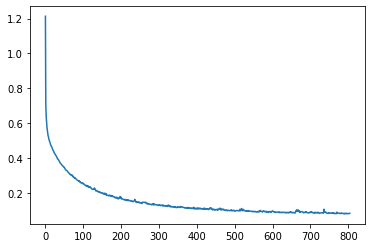

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(ls_all)

In [ ]:
def predict(X_test):
    with torch.no_grad():

        output = deepCell(X_test.float())
        y_pred = torch.argmax(output,dim=1)
    return y_pred

In [ ]:
y_pred = predict(X_test)

In [ ]:
y_pred

tensor([0, 0, 0,  ..., 9, 9, 9], device='cuda:0')

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test.cpu(),y_pred.cpu(),average=None)*100

In [ ]:
from sklearn.metrics import precision_score, recall_score

ps = precision_score(y_test.cpu(),y_pred.cpu(),average=None)*100

In [ ]:
rc = recall_score(y_test.cpu(),y_pred.cpu(),average=None)*100

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
f1 = np.round(f1,2)
ps = np.round(ps,2)
rc = np.round(rc,2)

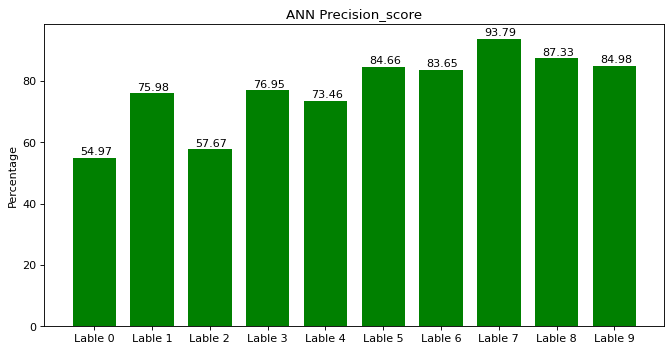

In [ ]:
divisions = ["Lable 0","Lable 1","Lable 2","Lable 3","Lable 4","Lable 5","Lable 6","Lable 7","Lable 8","Lable 9"]


plt.figure(figsize=(10,5), dpi=80)
index = np.arange(0,20,2)
plt.bar(index,ps,width=1.5,color='green',label='F1_score')

plt.xticks(index,divisions)
for index, value in enumerate(ps):
    plt.text(index*2-0.5, value+1,
             str(value))

plt.ylabel('Percentage')
# plt.xlabel('Recall_score')
plt.title('ANN Precision_score')

plt.savefig('ANN Precision_score.png')
plt.show()

In [ ]:
# import torch
# import torch.onnx as onnx
# import torchvision.models as models

In [ ]:
# torch.save(deepCell, 'deepCell.pth')

In [ ]:
# #sau khi chạy xong save cho t cái này
# torch.save({
#             'epoch': 500,
#             'model_state_dict': deepCell.state_dict(),
#             'optimizer_state_dict': deep_optimizer.state_dict(),


#             }, "/content/drive/MyDrive/HM/deepCell1.pth")

In [ ]:
# deepCell = Deep(n_letter,n_hidden,n_category).to(device)
# # deep_optimizer = optim.SGD(deepCell.parameters(), lr=learning_rate, momentum=0.9)
# deep_optimizer = optim.Adagrad(deepCell.parameters(), lr=learning_rate,initial_accumulator_value=0.1)



# checkpoint = torch.load("/content/drive/MyDrive/HM/deepCell.pth")
# deepCell.load_state_dict(checkpoint['model_state_dict'])
# deep_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# # loss = checkpoint['loss']

# deepCell.eval()
# # - or -
# # model.train()

Deep(
  (layer1): Linear(in_features=100, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [ ]:
def evaluate(X):
    with torch.no_grad():
      size = X.shape[0]
      # hidden = lstmCell.initHidden(size)
      # cadidate = lstmCell.initHidden(size)
      # deep_optimizer.zero_grad()

      output = deepCell(X.float())
      lable = torch.argmax(output,dim=1)
    return lable

In [ ]:
pred = evaluate(X_test)


In [ ]:
pred

tensor([0, 0, 0,  ..., 9, 9, 9], device='cuda:0')

In [ ]:
y_test

tensor([0, 0, 0,  ..., 9, 9, 9])

In [ ]:
 from sklearn.metrics import f1_score
 f1_score(y_test.cpu(), pred.cpu(), average=None)*100

array([60.61980348, 84.17935702, 71.20689655, 84.3510615 , 80.69105691,
       88.85035547, 88.80193777, 95.91608392, 90.54913976, 88.62151942])

In [ ]:
array([61.43987938, 84.76251881, 70.59851464, 84.79893946, 80.74927224,
       89.4085282 , 89.48545861, 96.11446206, 91.30333411, 88.83959044])
